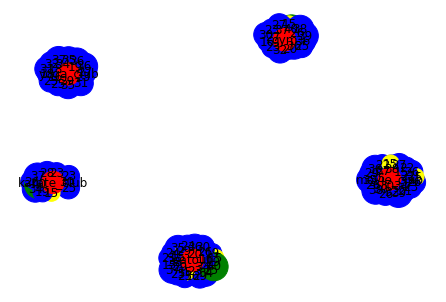

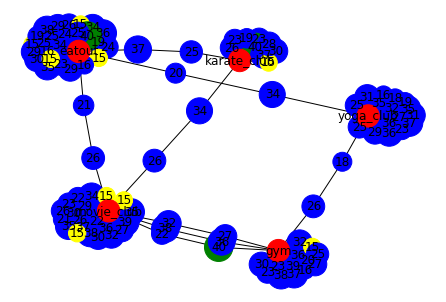

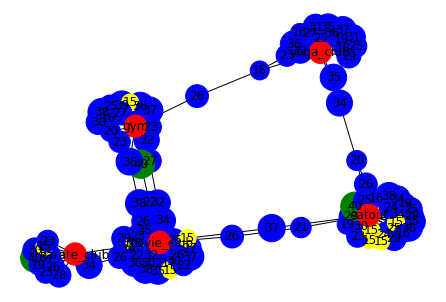

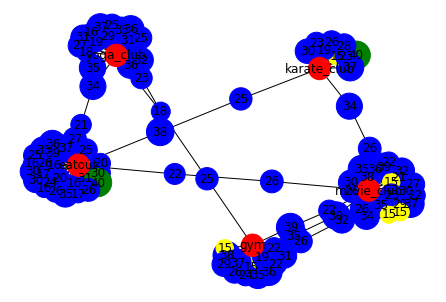

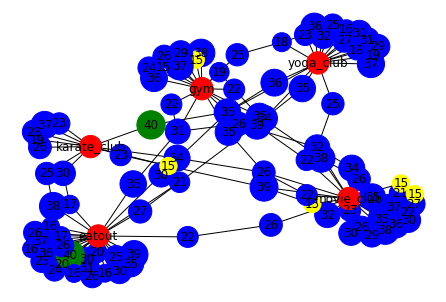

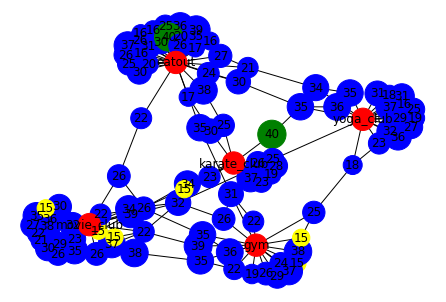

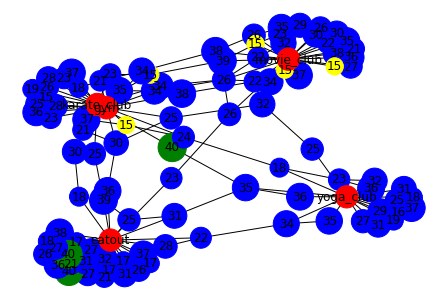

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
  
# 1- Create a graph with lets say 100 nodes
# 2- Add egdes and labels.
def create():
    G = nx.Graph()
    G.add_nodes_from(range(1, 101))
    return G
  
def visualize(G):
    labeldict = get_labels(G)
    nodesize = get_size(G)
    color = get_colors(G)
    nx.draw(G, labels=labeldict, node_size=nodesize, node_color=color)
    plt.show()
  
  
def assign_bmi(G):
    
    for each in G.nodes():
        G.nodes[each]['name'] = random.randint(15, 40)
        G.nodes[each]['type'] = 'person'
  
  
def get_labels(G):
    dict1 = {}
      
    for each in G.nodes():
        dict1[each] = G.nodes[each]['name']
          
    return dict1
  
def get_size(G):
    array1 = []
    for each in G.nodes():
        if (G.nodes[each]['type'] == 'person'):
            array1.append(G.nodes[each]['name'] * 20)
        else:
            array1.append(500)
    return array1
  
# 3. Add foci nodes
def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eatout', 'movie_club', 
                  'karate_club', 'yoga_club']
      
    for j in range(5):
        G.add_node(i)
        G.nodes[i]['name'] = foci_nodes[j]
        G.nodes[i]['type'] = 'foci'
        i += 1
  
  
def get_colors(G):
    c = []
      
    for i in G.nodes():
        if (G.nodes[i]['type'] == 'person'):
            if (G.nodes[i]['name'] == 15):
                c.append('yellow')
            elif (G.nodes[i]['name'] == 40):
                c.append('green')
            else:
                c.append('blue')
        else:
            c.append('red')
    return c
  
def get_person_nodes(G):
    p = []
      
    for i in G.nodes():
        if (G.nodes[i]['type'] == 'person'):
            p.append(i)
    return p
  
def get_foci_nodes(G):
    f = []
      
    for i in G.nodes():
        if (G.nodes[i]['type'] == 'foci'):
            f.append(i)
    return f
  
def add_foci_edges(G):
    foci_nodes = get_foci_nodes(G)
    person_nodes = get_person_nodes(G)
      
    for i in person_nodes:
        r = random.choice(foci_nodes)
        G.add_edge(i, r)

def homophily(G):
    pnodes = get_person_nodes(G)
      
    for u in pnodes:
        for v in pnodes:
            if (u != v):
                diff = abs(G.nodes[u]['name'] - G.nodes[v]['name'])
                p = 1 / (diff + 1000)
                r = random.uniform(0, 1)
                if (r < p):
                    G.add_edge(u, v)
  
# 5. Implement Closure
def common(u, v, G):
    nu = set(G.neighbors(u))
    nv = set(G.neighbors(v))
    return (len(nu & nv))
  
def closure(G):
    array1 = []
    for u in G.nodes():
        for v in G.nodes():
            if (u != v and G.nodes[u]['type'] == 'person' or G.nodes[v]['type'] == 'person'):
                
                # common function will return start node, 
                # end node and Graph itself.
                k = common(u, v, G)
                p = 1 - math.pow(1 - 0.01, k)
                tmp = []
                tmp.append(u)
                tmp.append(v)
                tmp.append(p)
                array1.append(tmp)
    for i in array1:
        u = i[0]
        v = i[1]
        p = i[2]
        r = random.uniform(0, 1)
        if r < p:
            G.add_edge(u, v)
  

def social_influence(G):
    fnodes = get_foci_nodes(G)
      
    for i in fnodes:
        if (G.nodes[i]['name'] == 'eatout'):
            for j in G.neighbors(i):
                if (G.nodes[j]['name'] != 40):
                    G.nodes[j]['name'] = G.nodes[j]['name'] + 1
                      
        if (G.nodes[i]['name'] == 'gym'):
            for j in G.neighbors(i):
                if (G.nodes[j]['name'] != 15):
                    G.nodes[j]['name'] = G.nodes[j]['name'] - 1
  
  
G = create()
assign_bmi(G)
  
# to add foci field in the nodes
add_foci_nodes(G)
add_foci_edges(G)
visualize(G)
  
for t in range(1, 3):
    homophily(G)
    visualize(G)
    closure(G)
    visualize(G)
    social_influence(G)
    visualize(G)